### purpose

visualize mutivariate climate outlier scenarios

In [1]:
from pythonimports import *
from myfigs import save_pdf

import MVP_summary_functions as mvp

import seaborn as  sns
from matplotlib.ticker import FormatStrFormatter
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
plt.rcParams.update({'font.family' : 'serif'})

t0 = dt.now()  # notebook timer

summarydir = '/work/lotterhos/MVP-Offsets/run_20220919/summaries'
figdir = makedir(f'{summarydir}/04_outlier_climate_runs/09_visualize_multivariate_outlier_results/figs')

mvp.latest_commit()
session_info.show()

#########################################################
Today:	October 04, 2023 - 12:43:37 EDT
python version: 3.8.5
conda env: mvp_env

Current commit of pythonimports:
commit 9493334506a1f2926fba0734fa74ba2f87194611  
Author: Brandon Lind <lind.brandon.m@gmail.com>  
Date:   Fri Jun 30 09:41:00 2023 -0400

Current commit of MVP_offsets:
commit 4df974c6efa2868236cc272fcc84eb1059ca8aef  
Author: Brandon Lind <lind.brandon.m@gmail.com>  
Date:   Tue Sep 26 09:31:50 2023 -0400
#########################################################



# read in validation scores

In [2]:
outerdir = '/home/b.lind/offsets/climate_outlier_runs/tutorial/run_20220919_tutorial'

programs = ['GF', 'lfmm2', 'rda']

dfs = []
for program in programs:
    df = pd.read_table(f'{outerdir}/{program}/validation/climate_outlier_validation_scores.txt')
    
    if program == 'rda':
        df['program'] = 'rda-' + df['structcorr']
    else:
        df['program'] = program
    
    dfs.append(df)
    
    for program in df.program.unique():
        print(program, sum(df.program == program))
        
validation = pd.concat(dfs)

validation.head()

GF 144
lfmm2 144
rda-nocorr 192
rda-structcorr 192


,seed,marker_set,program,outlier_clim,score,block,glevel,plevel,pleio,slevel,landscape,popsize,migration,structcorr
0,tutorial,adaptive,GF,0.00,-0.640777,all,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tutorial,adaptive,GF,1.72,-0.513142,all,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,tutorial,adaptive,GF,2.35,-0.536822,all,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,tutorial,adaptive,GF,2.74,-0.563087,all,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,tutorial,adaptive,GF,3.13,-0.576018,all,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# make sure everything looks good - should be divisible by 12 (number of outlier scenarios)
for program in validation.program.unique():
    df = validation[validation.program == program].copy()
    print(program)
    print(df.marker_set.value_counts())

GF
adaptive    48
all         48
neutral     48
Name: marker_set, dtype: int64
lfmm2
adaptive    48
all         48
neutral     48
Name: marker_set, dtype: int64
rda-nocorr
adaptive        48
all             48
neutral         48
rda_outliers    48
Name: marker_set, dtype: int64
rda-structcorr
adaptive        48
all             48
neutral         48
rda_outliers    48
Name: marker_set, dtype: int64


In [4]:
validation[validation.program == 'GF'].outlier_clim.value_counts()

0.00    12
1.72    12
2.35    12
2.74    12
3.13    12
3.53    12
3.92    12
4.31    12
4.70    12
5.09    12
5.48    12
5.88    12
Name: outlier_clim, dtype: int64

In [5]:
validation[validation.program == 'GF'].outlier_clim.unique().__len__()

12

In [6]:
# don't forget I used different blocks of populations to validate (`block` column)
validation[(validation.program == 'GF') & (validation.outlier_clim == 1.72)]

,seed,marker_set,program,outlier_clim,score,block,glevel,plevel,pleio,slevel,landscape,popsize,migration,structcorr
1,tutorial,adaptive,GF,1.72,-0.513142,all,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,tutorial,adaptive,GF,1.72,-0.833333,northwest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,tutorial,adaptive,GF,1.72,-0.666667,rangecenter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37,tutorial,adaptive,GF,1.72,-0.444444,southeast,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49,tutorial,all,GF,1.72,-0.488880,all,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,tutorial,all,GF,1.72,-0.666667,northwest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73,tutorial,all,GF,1.72,-0.777778,rangecenter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85,tutorial,all,GF,1.72,-0.333333,southeast,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,tutorial,neutral,GF,1.72,-0.472301,all,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109,tutorial,neutral,GF,1.72,-0.666667,northwest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
validation.block.isnull().sum()

0

In [8]:
validation.score.isnull().sum()

0

In [9]:
validation.marker_set.isnull().sum()

0

# create some figures

lfmm2


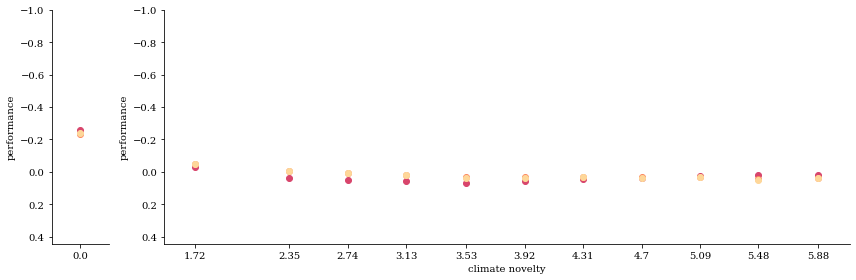

rda-nocorr


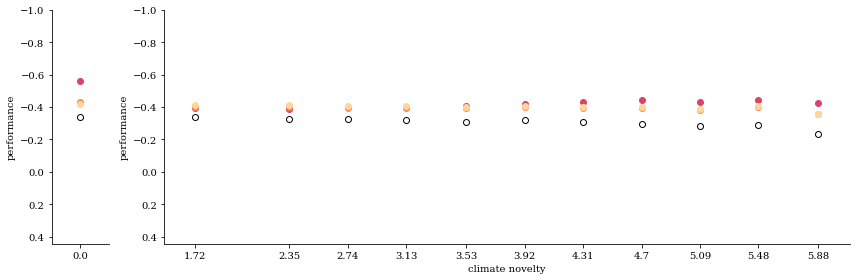

rda-structcorr


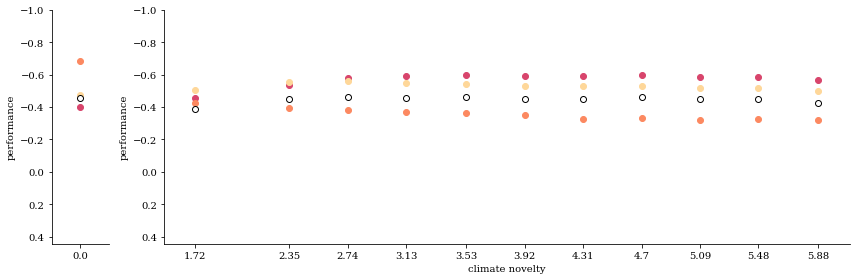

GF


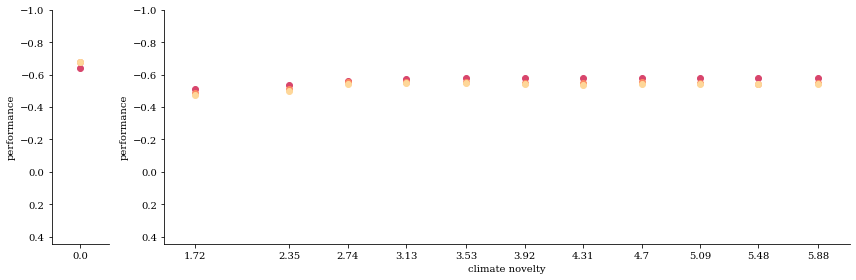

In [10]:
# scatter plot
mvp.boxplot_kwargs['palette']['rda_outliers'] = 'white'

for program in mvp.hue_order['program'][2:]:
    df = validation[(validation.program == program) &
                    (validation.block == 'all')]
    
    fig, (center_ax, novelty_ax) = plt.subplots(ncols=2, gridspec_kw={'width_ratios' : [1, 12]})
    fig.figure.set_size_inches(12, 4)

    marker_order = mvp.hue_order['marker_set'].copy()
    if 'rda' in program:
        marker_order.append('rda_outliers')
    
    print(program)
    
    for i, marker_set in enumerate(marker_order):
        marker_df = df[df.marker_set == marker_set]
        
        # plot on range center
        center_df = marker_df[marker_df.outlier_clim == 0]
        center_scatter = center_ax.scatter(
            x=center_df.outlier_clim.unique().tolist(),
            y=center_df.score,
            color=mvp.boxplot_kwargs['palette'][marker_set],
            edgecolors='k' if marker_set == 'rda_outliers' else None
        )
        
        # plot on novelty scenarios
        novelty_df = marker_df[marker_df.outlier_clim != 0]
        novelty_scatter = plt.scatter(
            x=novelty_df.outlier_clim.tolist(),
            y=novelty_df.score,
            color=mvp.boxplot_kwargs['palette'][marker_set],
            edgecolors='k' if marker_set == 'rda_outliers' else None
        )
        
    for ax, ax_df in zip([center_scatter, novelty_scatter], [center_df, novelty_df]):  # doesn't matter that I'm only using the last marker_df for center/novelty_df
        ax.axes.set_ylim(validation.score.min(), validation.score.max())
        ax.axes.invert_yaxis()
        if len(ax_df.outlier_clim.unique()) > 1:
            ax.axes.set_xlabel('climate novelty')
        ax.axes.set_xticks(ax_df.outlier_clim.unique())
        ax.axes.set_xticklabels(ax_df.outlier_clim.unique())
        ax.axes.set_ylabel('performance')
        sns.despine(bottom=False, left=False, ax=ax.axes)
        
    plt.tight_layout()
    plt.show()
    plt.close()

In [11]:
df.outlier_clim.unique()

array([0.  , 1.72, 2.35, 2.74, 3.13, 3.53, 3.92, 4.31, 4.7 , 5.09, 5.48,
       5.88])

lfmm2


/tmp/ipykernel_212167/3675110252.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), fontsize=12)


Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/04_outlier_climate_runs/09_visualize_multivariate_outlier_results/figs/mutlivariate_lfmm2_novelty_by_performance_by_marker_set.pdf


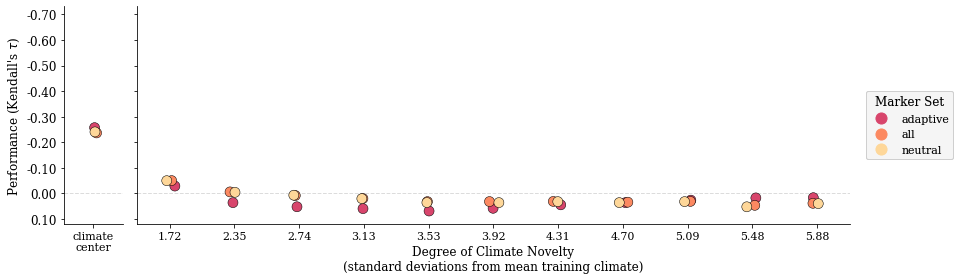

rda-nocorr


/tmp/ipykernel_212167/3675110252.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), fontsize=12)


Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/04_outlier_climate_runs/09_visualize_multivariate_outlier_results/figs/mutlivariate_rda-nocorr_novelty_by_performance_by_marker_set.pdf


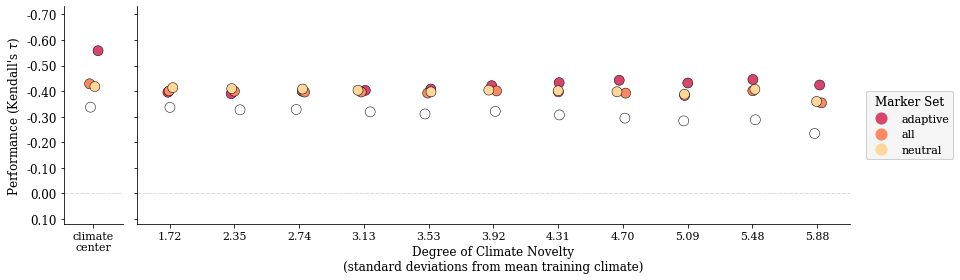

rda-structcorr


/tmp/ipykernel_212167/3675110252.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), fontsize=12)


Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/04_outlier_climate_runs/09_visualize_multivariate_outlier_results/figs/mutlivariate_rda-structcorr_novelty_by_performance_by_marker_set.pdf


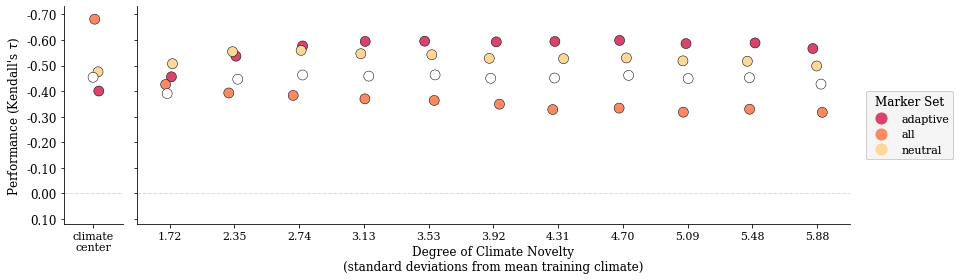

GF


/tmp/ipykernel_212167/3675110252.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), fontsize=12)


Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/04_outlier_climate_runs/09_visualize_multivariate_outlier_results/figs/mutlivariate_GF_novelty_by_performance_by_marker_set.pdf


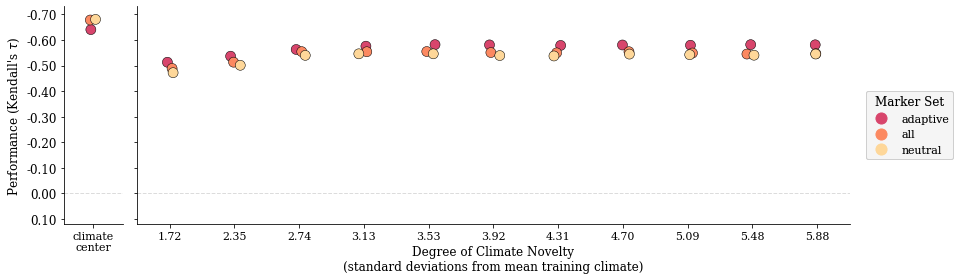

In [12]:
# cat plot so x-axis is evenly spaced
mvp.boxplot_kwargs['palette']['rda_outliers'] = 'white'

for program in mvp.hue_order['program'][2:]:
    print(ColorText(program).bold())
    
    df = validation[(validation.program == program) &
                    (validation.block == 'all')]
    
    marker_order = mvp.hue_order['marker_set'].copy()
    if 'rda' in program:
        marker_order.append('rda_outliers')
        
    fig, axes = plt.subplots(ncols=2, figsize=(12, 4), sharey=True,
                             gridspec_kw={'width_ratios': [1, len(validation.outlier_clim.unique())]})

    for i, ax in enumerate(axes):
        if i == 0:
            data_df = df[df.outlier_clim == 0]
        else:
            data_df = df[df.outlier_clim != 0]
            
        g = sns.stripplot(
            data=data_df,
            x='outlier_clim',
            y='score',
            hue='marker_set',
            palette= mvp.boxplot_kwargs['palette'],
            ax=ax,
            size=10,
            jitter=True,
            edgecolor='k', linewidth=0.5
        #     scatter_kws={'color' : mvp.boxplot_kwargs['palette'][marker_set]}
        )
        
        g.legend_.remove()

        g.set(ylim=(validation[validation.block=='all'].score.max() + 0.05,
                    validation[validation.block=='all'].score.min() - 0.05))
        
        g.axhline(0, linestyle='--', color='gainsboro', linewidth=1, zorder=0)
        
        if i == 0:
            g.set(xlabel=None)
            ax.set_xticklabels(['climate\ncenter'], fontsize=11)
            ax.set_ylabel("Performance (Kendall's $\\tau$)", fontsize=12)
            ax.set_yticklabels(ax.get_yticks(), fontsize=12)
            ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
        else:
            ax.set_xticklabels(['{:.2f}'.format(float(tick.get_text())) for tick in ax.get_xticklabels()], fontsize=11)
            ax.set_ylabel(None)
            g.set_xlabel('Degree of Climate Novelty\n(standard deviations from mean training climate)',
                         fontsize=12)
#             ax.set_yticklables()
#             ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))

    sns.despine()
    plt.tight_layout()
    mvp.add_legend(g.figure, color_by='marker_set', loc='center left', bbox_to_anchor=(1, 0.55))
    
    save_pdf(f'{figdir}/mutlivariate_{program}_novelty_by_performance_by_marker_set.pdf')
    
    plt.show()

lfmm2
rda-nocorr
rda-structcorr
GF


/tmp/ipykernel_212167/3881275294.py:54: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), fontsize=12)


Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/04_outlier_climate_runs/09_visualize_multivariate_outlier_results/figs/mutlivariate_all-methods_novelty_by_performance_by_marker_set.pdf


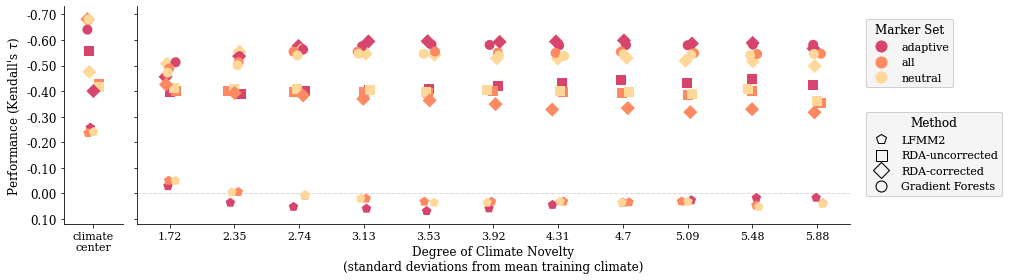

In [13]:
# all programs same figure
# cat plot so x-axis is evenly spaced
mvp.boxplot_kwargs['palette']['rda_outliers'] = 'white'


fig, axes = plt.subplots(ncols=2, figsize=(12, 4), sharey=True,
                         gridspec_kw={'width_ratios': [1, len(validation.outlier_clim.unique())]})

for program in mvp.hue_order['program'][2:]:
    print(program)
    
    df = validation[(validation.program == program) &
                    (validation.block == 'all') &
                    (validation.marker_set != 'rda_outliers')
                   ]
    
    marker_order = mvp.hue_order['marker_set'].copy()
    if 'rda' in program:
        marker_order.append('rda_outliers')

    for i, ax in enumerate(axes):
        if i == 0:
            data_df = df[df.outlier_clim == 0]
        else:
            data_df = df[df.outlier_clim != 0]
            
        g = sns.stripplot(
            data=data_df,
            x='outlier_clim',
            y='score',
            hue='marker_set',
            palette= mvp.boxplot_kwargs['palette'],
            ax=ax,
            size=10,
            jitter=True,
            marker=mvp.markers[program]
        #     scatter_kws={'color' : mvp.boxplot_kwargs['palette'][marker_set]}
        )
        
        g.legend_.remove()
        
for i, ax in enumerate(axes):

    g.set(ylim=(validation[validation.block=='all'].score.max() + 0.05,
                validation[validation.block=='all'].score.min() - 0.05))

    g.axhline(0, linestyle='--', color='gainsboro', linewidth=1, zorder=0)

    if i == 0:
        g.set(xlabel=None)
        ax.set_xticklabels(['climate\ncenter'], fontsize=11)
        ax.set_ylabel("Performance (Kendall's $\\tau$)", fontsize=12)
        ax.set_xlabel(None)
        ax.set_yticklabels(ax.get_yticks(), fontsize=12)
        ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    else:
        ax.set_xticklabels(ax.get_xticklabels(), fontsize=11)
        ax.set_ylabel(None)
        g.set_xlabel('Degree of Climate Novelty\n(standard deviations from mean training climate)',
                     fontsize=12)

sns.despine()
plt.tight_layout()
mvp.add_legend(g.figure, color_by='marker_set', loc='center left', bbox_to_anchor=(1, 0.8))
mvp.add_legend(g.figure, color_by='program', use_markers=True, legendmarkerfacecolor=None,
               loc='center left', bbox_to_anchor=(1, 0.45), exclude_RONA=True, markeredgecolor='k')

save_pdf(f'{figdir}/mutlivariate_all-methods_novelty_by_performance_by_marker_set.pdf')
plt.show()

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/04_outlier_climate_runs/09_visualize_multivariate_outlier_results/figs/all_programs.pdf


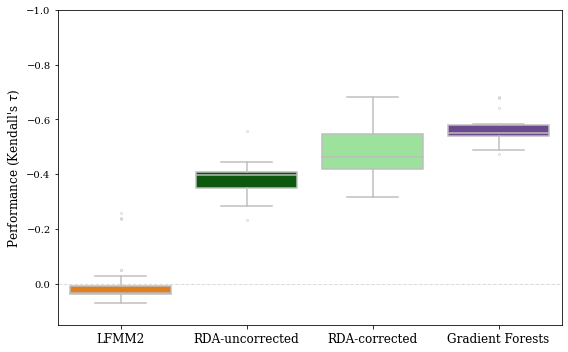

In [14]:
# with rda outliers
g = sns.boxplot(
    data=validation[validation.block == 'all'],
    x='program',
    order=mvp.hue_order['program'][2:],
    y='score',
    **mvp.boxplot_kwargs
)

g.axes.invert_yaxis()
g.axes.set_ylim((0.15, -1))
g.figure.set_size_inches(8, 5)
g.axes.set_xlabel(None)
g.axes.set_ylabel("Performance (Kendall's $\\tau$)", fontsize=12)

xlim = g.axes.get_xlim()  # for next fig without rda outliers
ylim = g.axes.get_ylim()  # for next fig without rda outliers

g.axhline(0, linestyle='--', color='gainsboro', linewidth=1, zorder=0)

mvp.update_ticklabels(g.axes, fontsize=12)

plt.tight_layout()

save_pdf(f'{figdir}/all_programs.pdf')

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/04_outlier_climate_runs/09_visualize_multivariate_outlier_results/figs/all_programs_without_rda-outliers.pdf


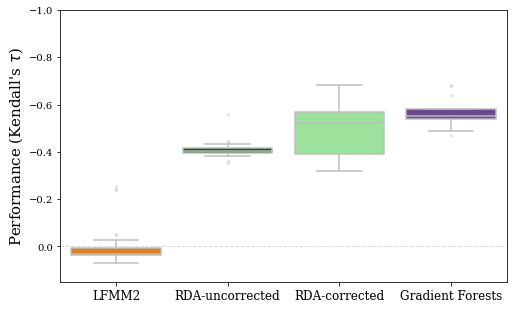

In [17]:
# without rda outliers
g = sns.boxplot(
    data=validation[(validation.block == 'all') & (validation.marker_set != 'rda_outliers')],
    x='program',
    order=mvp.hue_order['program'][2:],
    y='score',
    **mvp.boxplot_kwargs
)

mvp.update_ticklabels(g, fontsize=12)
g.axes.invert_yaxis()
g.figure.set_size_inches(8, 5)
g.axes.set_ylabel("Performance (Kendall's $\\tau$)", fontsize=15)
g.axes.set_xlabel(None)
g.axhline(0, linestyle='--', color='gainsboro', linewidth=1, zorder=0)
# set x- and ylim to same as previous fig
g.axes.set_xlim(xlim)
g.axes.set_ylim(ylim)

save_pdf(f'{figdir}/all_programs_without_rda-outliers.pdf')

In [16]:
formatclock(dt.now() - t0)

'0-00:00:08'